In [14]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_csv("3_classes_processed_data.csv")

In [3]:
label_encoders = {}
for column in ['ductility', 'roof', 'relative_position']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [4]:
# Encode the target variable
label_encoder_target = LabelEncoder()
df['structural_system'] = label_encoder_target.fit_transform(df['structural_system'])

# Define features and target
X = df.drop(columns=['structural_system'])
y = df['structural_system']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [23]:
# Define a very simple neural network model
class VerySimpleNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(VerySimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        return x

# Initialize the model, loss function, and optimizer
input_size = X_train_res_scaled.shape[1]
num_classes = len(label_encoder_target.classes_)
model = VerySimpleNN(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # Using SGD with momentum


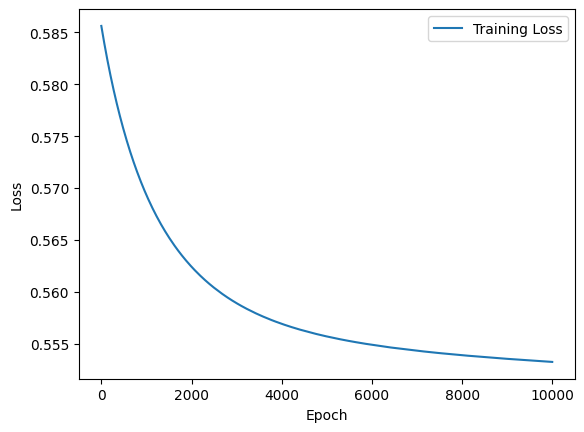

With SMOTE and Complex Model:
Accuracy: 0.6753623188405797
Classification Report:
              precision    recall  f1-score   support

          CR       0.51      0.76      0.61        63
           M       0.88      0.63      0.74       238
       Other       0.42      0.77      0.55        44

    accuracy                           0.68       345
   macro avg       0.61      0.72      0.63       345
weighted avg       0.76      0.68      0.69       345



In [25]:
# Training the model with loss tracking
num_epochs = 10000
losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_res_tensor)
    loss = criterion(outputs, y_train_res_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    scheduler.step()

# Plot the training loss
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)

# Decode the predictions for interpretation
y_pred_decoded = label_encoder_target.inverse_transform(predicted.numpy())
y_test_decoded = label_encoder_target.inverse_transform(y_test_tensor.numpy())

# Evaluate the model
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
report = classification_report(y_test_decoded, y_pred_decoded)

print("With SMOTE and Complex Model:")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

In [11]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Standardize the features
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_res_tensor = torch.tensor(X_train_res_scaled, dtype=torch.float32)
y_train_res_tensor = torch.tensor(y_train_res.values, dtype=torch.long)

# Initialize the model, loss function, and optimizer
model_smote = SimpleNN(input_size, num_classes)
criterion_smote = nn.CrossEntropyLoss()
optimizer_smote = optim.Adam(model_smote.parameters(), lr=0.001)

# Train the model
for epoch in range(num_epochs):
    model_smote.train()
    optimizer_smote.zero_grad()
    outputs_smote = model_smote(X_train_res_tensor)
    loss_smote = criterion_smote(outputs_smote, y_train_res_tensor)
    loss_smote.backward()
    optimizer_smote.step()

# Make predictions
model_smote.eval()
with torch.no_grad():
    outputs_smote = model_smote(X_test_tensor)
    _, predicted_smote = torch.max(outputs_smote, 1)

# Decode the predictions for interpretation
y_pred_smote_decoded = label_encoder_target.inverse_transform(predicted_smote.numpy())

# Evaluate the model
accuracy_smote = accuracy_score(y_test_decoded, y_pred_smote_decoded)
report_smote = classification_report(y_test_decoded, y_pred_smote_decoded)

print("With SMOTE:")
print(f"Accuracy: {accuracy_smote}")
print("Classification Report:")
print(report_smote)


With SMOTE:
Accuracy: 0.6956521739130435
Classification Report:
              precision    recall  f1-score   support

          CR       0.51      0.75      0.60        63
           M       0.89      0.68      0.77       238
       Other       0.44      0.70      0.54        44

    accuracy                           0.70       345
   macro avg       0.61      0.71      0.64       345
weighted avg       0.76      0.70      0.71       345

